# Predicting Breast Cancer - Logistic Regression

Base on: Mike M. Lee, 10th Oct 2017, article.


# The Data
---
*Extracted from the [UCI ML repository](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29)*

* **id** 
* **diagnosis**: M = malignant, B = benign

*Columns 3 to 32* 

Ten real-valued features are computed for each cell nucleus: 

* **radius**: distances from center to points on the perimeter 
* **texture**: standard deviation of gray-scale values
* **perimeter** 
* **area** 
* **smoothness**: local variation in radius lengths 
* **compactness**: perimeter^2 / area - 1.0 
* **concavity**: severity of concave portions of the contour
* **concave points**: number of concave portions of the contour
* **symmetry** 
* **fractal dimension**: "coastline approximation" - 1

The mean, standard error, and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features.  For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.


In [1]:
# import dependencies
# data cleaning and manipulation 
import pandas as pd
import numpy as np
import os

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning
from sklearn.preprocessing import StandardScaler

import sklearn.linear_model as skl_lm
from sklearn import preprocessing
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split


import statsmodels.api as sm
import statsmodels.formula.api as smf


# initialize some package settings
sns.set(style="whitegrid", color_codes=True, font_scale=1.3)

%matplotlib inline

In [2]:
# Directorio Windows
#datadir = 'D:\\Users\\sebastian.castillo\\PycharmProjects\\research_tools\\data\\'
# Directorio Linux
datadir = '/home/sebacastillo/PycharmProjects/research_tools/data/'

In [3]:
# read in the data and check the first 5 rows
db_name= 'breast_cancer.csv' # evaluar con otros data
df= pd.read_csv(datadir + db_name)
df.columns = df.columns.str.replace(' ','_')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [4]:
# general summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              569 non-null    float64
 1   mean_texture             569 non-null    float64
 2   mean_perimeter           569 non-null    float64
 3   mean_area                569 non-null    float64
 4   mean_smoothness          569 non-null    float64
 5   mean_compactness         569 non-null    float64
 6   mean_concavity           569 non-null    float64
 7   mean_concave_points      569 non-null    float64
 8   mean_symmetry            569 non-null    float64
 9   mean_fractal_dimension   569 non-null    float64
 10  radius_error             569 non-null    float64
 11  texture_error            569 non-null    float64
 12  perimeter_error          569 non-null    float64
 13  area_error               569 non-null    float64
 14  smoothness_error         5

In [5]:
# check the data type of each column
df.dtypes

mean_radius                float64
mean_texture               float64
mean_perimeter             float64
mean_area                  float64
mean_smoothness            float64
mean_compactness           float64
mean_concavity             float64
mean_concave_points        float64
mean_symmetry              float64
mean_fractal_dimension     float64
radius_error               float64
texture_error              float64
perimeter_error            float64
area_error                 float64
smoothness_error           float64
compactness_error          float64
concavity_error            float64
concave_points_error       float64
symmetry_error             float64
fractal_dimension_error    float64
worst_radius               float64
worst_texture              float64
worst_perimeter            float64
worst_area                 float64
worst_smoothness           float64
worst_compactness          float64
worst_concavity            float64
worst_concave_points       float64
worst_symmetry      

In [6]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension',
       'radius_error', 'texture_error', 'perimeter_error', 'area_error',
       'smoothness_error', 'compactness_error', 'concavity_error',
       'concave_points_error', 'symmetry_error', 'fractal_dimension_error',
       'worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension',
       'target'],
      dtype='object')

Our response variable, **target**, is integer. All explanatory variables are numerical, so we can skip data type conversion.

Number of cells labeled Benign:  357
Number of cells labeled Malignant :  212

% of cells labeled Benign 62.74 %
% of cells labeled Malignant 37.26 %


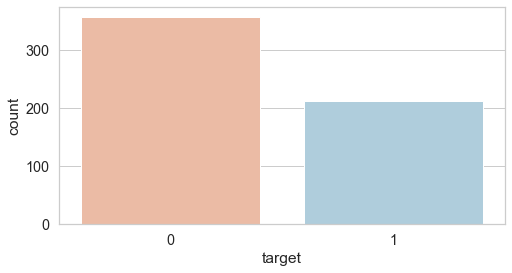

In [6]:
# visualize distribution of classes 
plt.figure(figsize=(8, 4))
sns.countplot(df['target'], palette='RdBu')

# count number of obvs in each class
benign, malignant = df['target'].value_counts()
print('Number of cells labeled Benign: ', benign)
print('Number of cells labeled Malignant : ', malignant)
print('')
print('% of cells labeled Benign', round(benign / len(df) * 100, 2), '%')
print('% of cells labeled Malignant', round(malignant / len(df) * 100, 2), '%');

Out of the 569 observations, 357 (or 62.7%) have been labeled malignant, while the rest 212 (or 37.3%) have been labeled benign. Later when we develop a predictive model and test it on unseen data, we should expect to see a similar proportion of labels.

Although our dataset has 30 columns  they are all in fact very closely related since they all contain information on the same 10 key attributes but only differ in terms of their perspectives (i.e., the mean, standard errors, and the mean of the three largest values denoted as "worst"). 

In this sense, we could attempt to dig out some quick insights by analyzing the data in only one of the three perspectives. For instance, we could choose to check out the relationship between the 10 key attributes and the **diagnosis** variable by only choosing the "mean" columns.

Let's quickly scan for any interesting patterns between our 10 "mean" columns and the response variable by generating a scatter plot matrix as shown below:

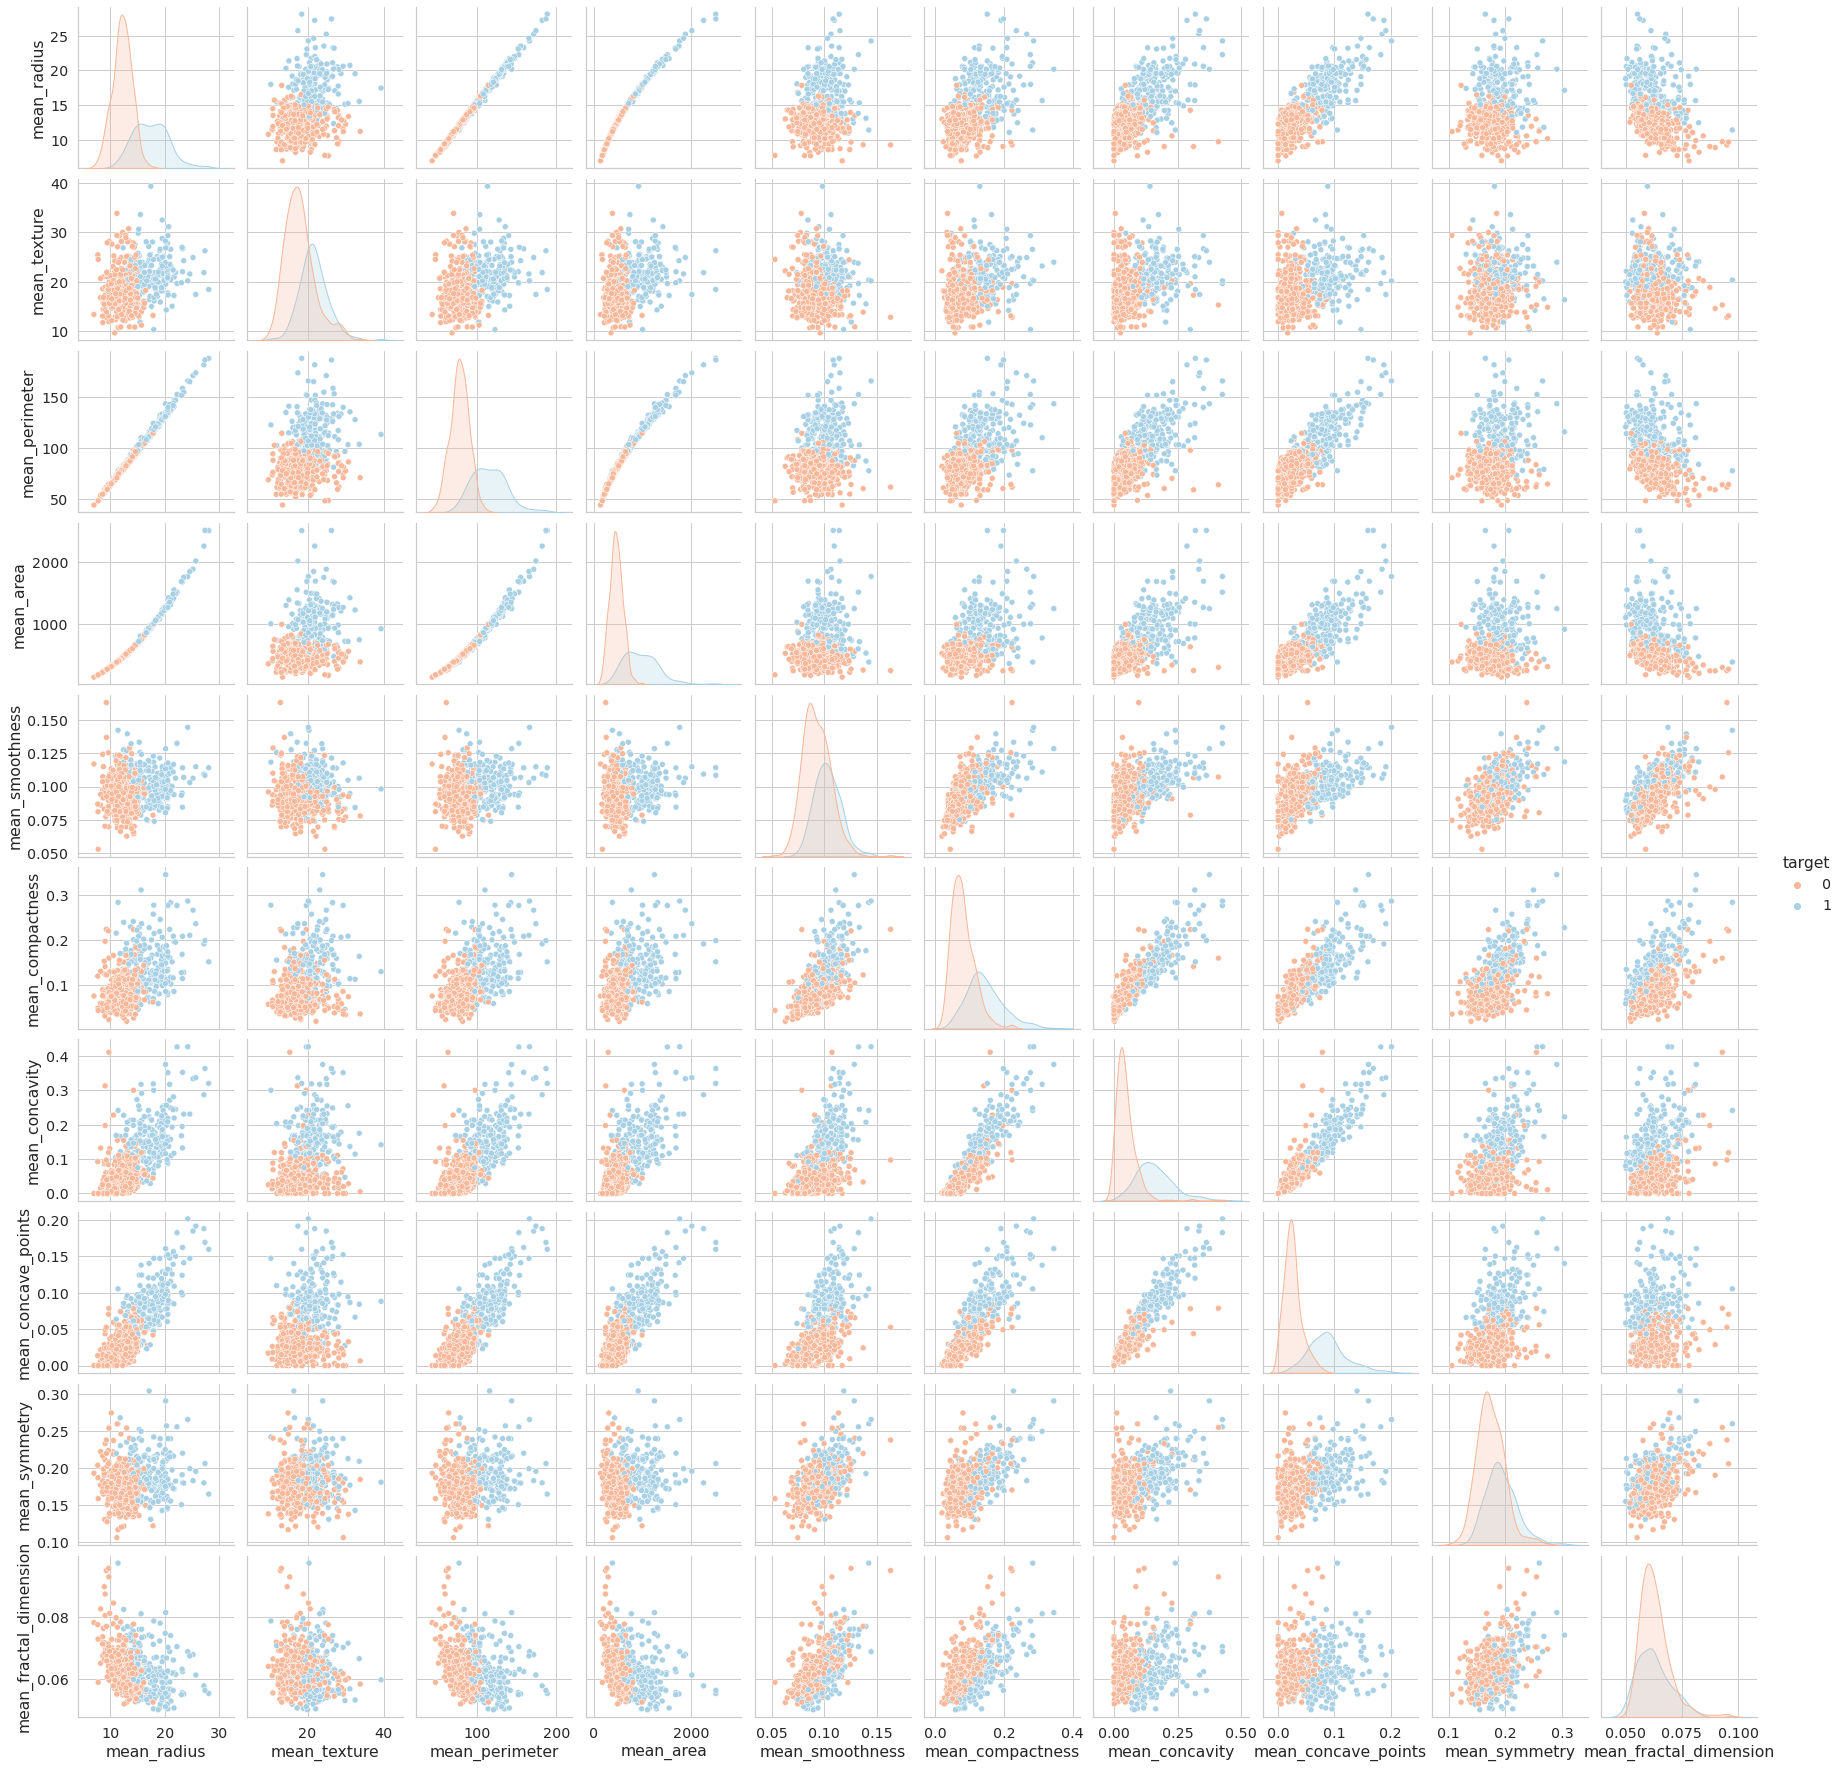

In [24]:
# generate a scatter plot matrix with the "mean" columns
cols = ['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'mean_compactness', 'mean_concavity',
       'mean_concave_points', 'mean_symmetry', 'mean_fractal_dimension', 
        'target']
sns.pairplot(data=df[cols], hue='target', palette='RdBu')

There are some interesting patterns visible. For instance, the almost perfectly linear patterns between the **radius**, **perimeter** and **area** attributes are hinting at the presence of multicollinearity between these variables. Another set of variables that possibly imply multicollinearity are the **concavity**, **concave_points** and **compactness**. 

In the coming up section, we will generate a matrix similar to the one above, but this time displaying the correlations between the variables instead of a scatter plot. Let's find out if our hypothesis about the multicollinearity has any statistical support. 

# The Variables
---
As said earlier, let's take a look at the correlations between our variables. This time however, we will create a correlation matrix with all variables (i.e., the "mean" columns, the "standard errors" columns, as well as the "worst" columns).

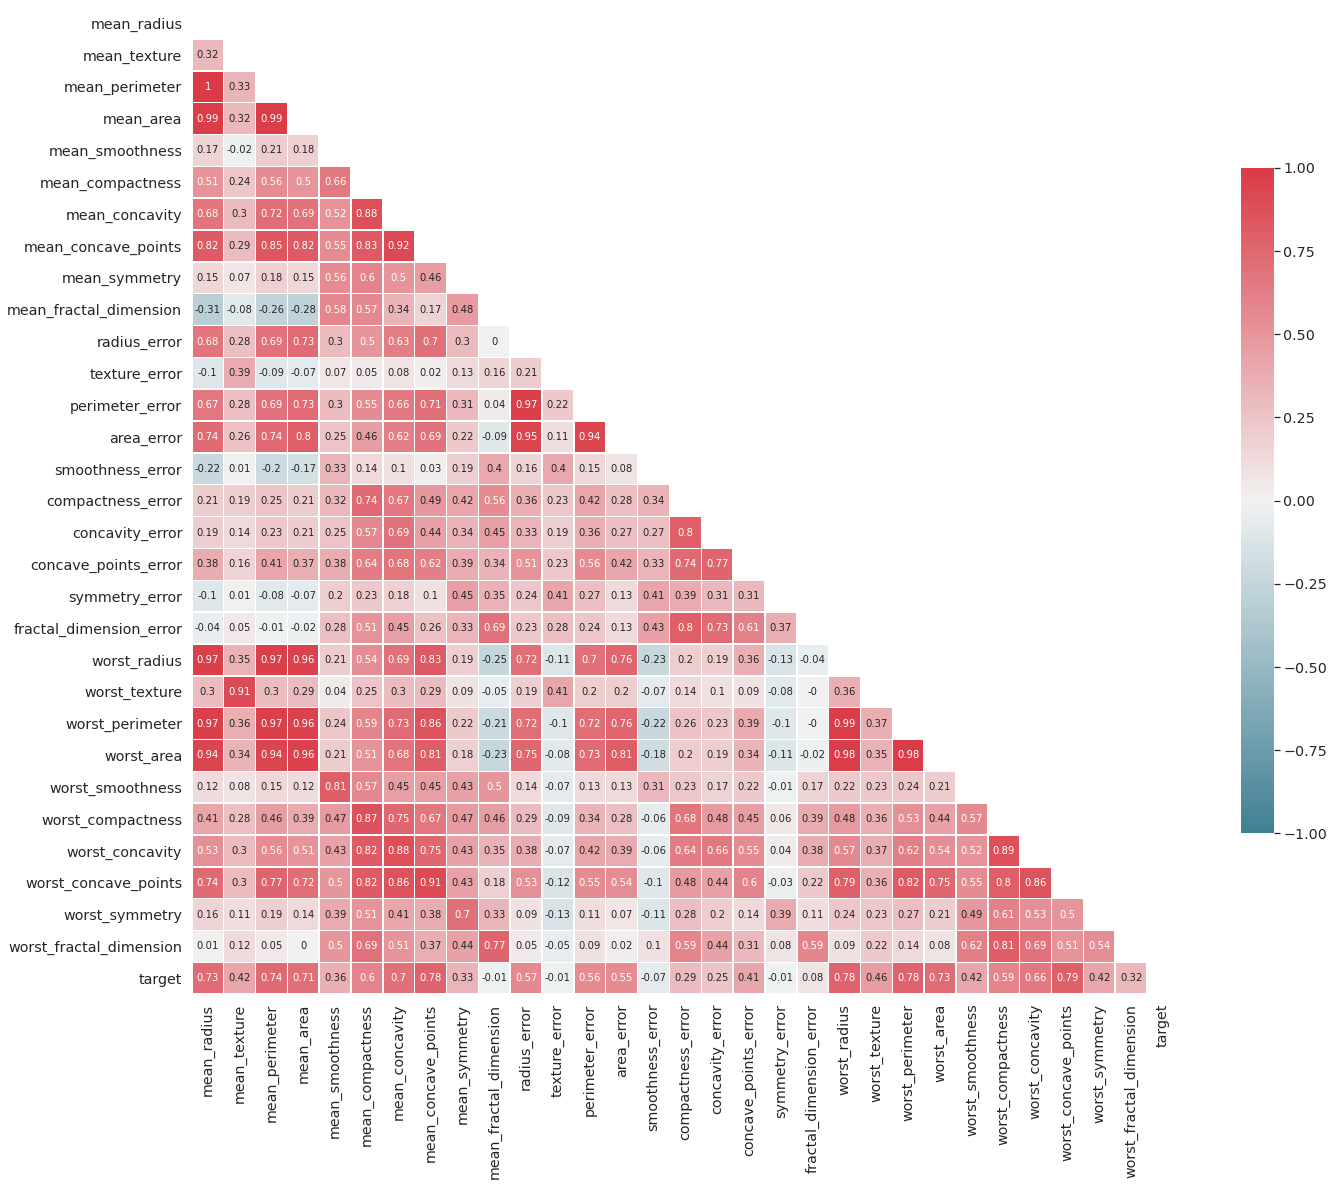

In [8]:
# Generate and visualize the correlation matrix
corr = df.corr().round(2)

# Mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set figure size
f, ax = plt.subplots(figsize=(20, 20))

# Define custom colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.tight_layout()

Looking at the matrix, we can immediately verify the presence of multicollinearity between some of our variables. For instance, the **radius_mean** column has a correlation of 1 and 0.99 with **perimeter_mean** and **area_mean** columns, respectively. This is probably because the three columns essentially contain the same information, which is the physical size of the observation (the cell). Therefore we should only pick one of the three columns when we go into further analysis.  Another place where multicollienartiy is apparent is between the "mean" columns and the "worst" column. For instance, the **radius_mean** column has a correlation of 0.97 with the **radius_worst** column. In fact, each of the 10 key attributes display very high (from 0.7 up to 0.97) correlations between its "mean" and "worst" columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" columns.  We will now go head and drop all unnecessary columns. 

In [9]:
df_base = df

In [27]:
# first, drop all "worst" columns
cols = ['worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = df.drop(cols, axis=1)

# then, drop all columns related to the "perimeter" and "area" attributes
cols = ['mean_perimeter',
        'perimeter_error', 
        'mean_area', 
        'area_error']
df = df.drop(cols, axis=1)

# lastly, drop all columns related to the "concavity" and "concave points" attributes
cols = ['mean_concavity',
        'concavity_error', 
        'mean_concave_points', 
        'concave_points_error']
df = df.drop(cols, axis=1)

# verify remaining columns
df.columns

Index(['mean_radius', 'mean_texture', 'mean_smoothness', 'mean_compactness',
       'mean_symmetry', 'mean_fractal_dimension', 'radius_error',
       'texture_error', 'smoothness_error', 'compactness_error',
       'symmetry_error', 'fractal_dimension_error', 'target'],
      dtype='object')

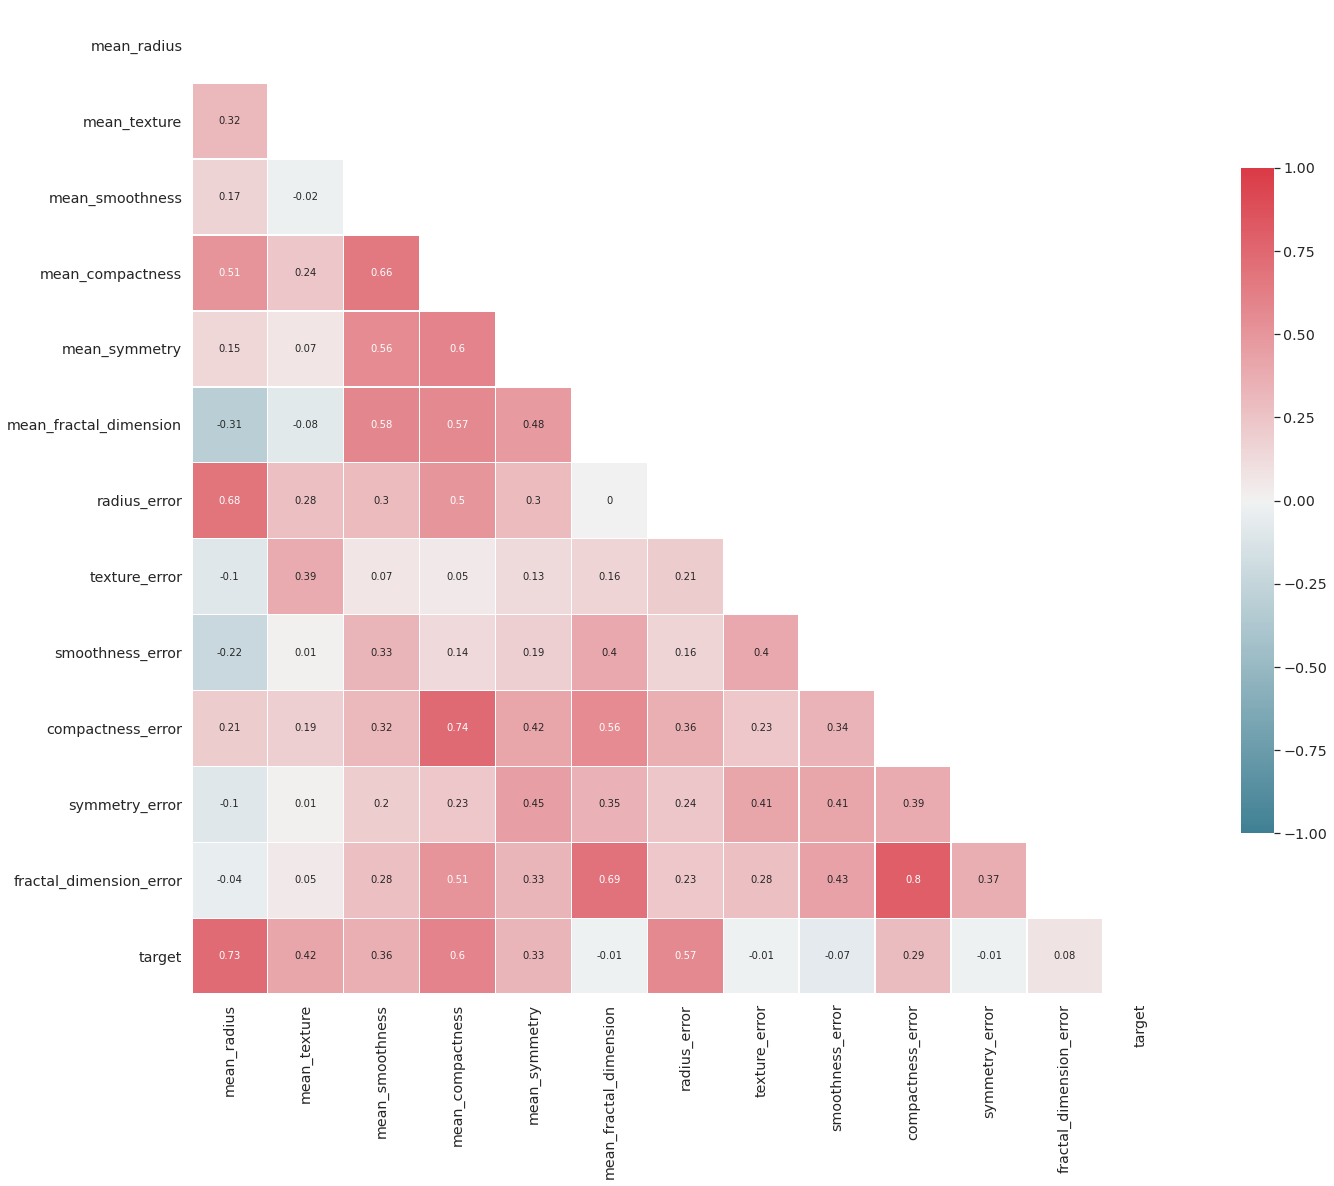

In [30]:
# Draw the heatmap again, with the new correlation matrix
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.tight_layout()

Looks great! Now let's move on to our model.

# Model
___

It's finally time to develop our model! We will start by first splitting our dataset into two parts; one as a training set for the model, and the other as a test set to validate the predictions that the model will make. If we omit this step, the model will be trained and tested on the same dataset, and it will underestimate the true error rate, a phenomenon known as **overfitting**. It is like writing an exam after taking a look at the questions and answers beforehand. We want to make sure that our model truly has predictive power and is able to accurately label unseen data. We will set the test size to 0.3; i.e., 70% of the data will be assigned to the training set, and the remaining 30% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 40.

In [66]:
# Split the data into training and testing sets
X = df
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [68]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 146 to 326
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              398 non-null    float64
 1   mean_texture             398 non-null    float64
 2   mean_smoothness          398 non-null    float64
 3   mean_compactness         398 non-null    float64
 4   mean_symmetry            398 non-null    float64
 5   mean_fractal_dimension   398 non-null    float64
 6   radius_error             398 non-null    float64
 7   texture_error            398 non-null    float64
 8   smoothness_error         398 non-null    float64
 9   compactness_error        398 non-null    float64
 10  symmetry_error           398 non-null    float64
 11  fractal_dimension_error  398 non-null    float64
 12  target                   398 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 43.5 KB


In [69]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 295 to 82
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              171 non-null    float64
 1   mean_texture             171 non-null    float64
 2   mean_smoothness          171 non-null    float64
 3   mean_compactness         171 non-null    float64
 4   mean_symmetry            171 non-null    float64
 5   mean_fractal_dimension   171 non-null    float64
 6   radius_error             171 non-null    float64
 7   texture_error            171 non-null    float64
 8   smoothness_error         171 non-null    float64
 9   compactness_error        171 non-null    float64
 10  symmetry_error           171 non-null    float64
 11  fractal_dimension_error  171 non-null    float64
 12  target                   171 non-null    int64  
dtypes: float64(12), int64(1)
memory usage: 18.7 KB


In [70]:
y_test

295    0
16     1
431    0
453    0
15     1
      ..
333    0
467    0
444    1
414    1
82     1
Name: target, Length: 171, dtype: int64

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [32]:
# Create a string for the formula
cols = df.columns.drop('target')
formula = 'target ~ ' + ' + '.join(cols)
print(formula, '\n')

target ~ mean_radius + mean_texture + mean_smoothness + mean_compactness + mean_symmetry + mean_fractal_dimension + radius_error + texture_error + smoothness_error + compactness_error + symmetry_error + fractal_dimension_error 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [71]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      385
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.340
Date:                Mon, 25 Oct 2021   Deviance:                       110.68
Time:                        18:59:31   Pearson chi2:                     125.
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Great! In the next section, we will feed in the test data to this model to yield predictions of labels. Then, we will evaluate how accurately the model have predicted the data. 

# Prediction
___

In the previous section, we have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. In other words, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigniing all values closer to 1 a label of "B". 

If this is confusiing, let's go through this step-by-step.

In [84]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

16     0.675749
431    0.003094
453    0.035290
15     0.999456
275    0.161281
dtype: float64

In [85]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_int = [ 0 if x < 0.5 else 1 for x in predictions]
predictions_nominal[1:6]

['B', 'M', 'M', 'B', 'M']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [89]:
print(classification_report(y_test, predictions_int, digits=3));

              precision    recall  f1-score   support

           0      0.982     0.965     0.974       115
           1      0.931     0.964     0.947        56

    accuracy                          0.965       171
   macro avg      0.957     0.965     0.961       171
weighted avg      0.966     0.965     0.965       171



Our model have accurately labeled 96.5% of the test data. This is just the beginning however. We could try to increase the accuracy even higher by using a different algorithm other than the `logistic regression`, or try our model with different set of variables. 

# Predecir en base a todas las variables

In [21]:
cols = ['worst_radius', 'worst_texture', 'worst_perimeter', 'worst_area',
       'worst_smoothness', 'worst_compactness', 'worst_concavity',
       'worst_concave_points', 'worst_symmetry', 'worst_fractal_dimension']
df = df_base.drop(cols, axis=1)

In [22]:
# Split the data into training and testing sets
X = df
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [23]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 398 entries, 146 to 326
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              398 non-null    float64
 1   mean_texture             398 non-null    float64
 2   mean_perimeter           398 non-null    float64
 3   mean_area                398 non-null    float64
 4   mean_smoothness          398 non-null    float64
 5   mean_compactness         398 non-null    float64
 6   mean_concavity           398 non-null    float64
 7   mean_concave_points      398 non-null    float64
 8   mean_symmetry            398 non-null    float64
 9   mean_fractal_dimension   398 non-null    float64
 10  radius_error             398 non-null    float64
 11  texture_error            398 non-null    float64
 12  perimeter_error          398 non-null    float64
 13  area_error               398 non-null    float64
 14  smoothness_error        

In [24]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 295 to 82
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean_radius              171 non-null    float64
 1   mean_texture             171 non-null    float64
 2   mean_perimeter           171 non-null    float64
 3   mean_area                171 non-null    float64
 4   mean_smoothness          171 non-null    float64
 5   mean_compactness         171 non-null    float64
 6   mean_concavity           171 non-null    float64
 7   mean_concave_points      171 non-null    float64
 8   mean_symmetry            171 non-null    float64
 9   mean_fractal_dimension   171 non-null    float64
 10  radius_error             171 non-null    float64
 11  texture_error            171 non-null    float64
 12  perimeter_error          171 non-null    float64
 13  area_error               171 non-null    float64
 14  smoothness_error         

In [25]:
y_test

295    0
16     1
431    0
453    0
15     1
      ..
333    0
467    0
444    1
414    1
82     1
Name: target, Length: 171, dtype: int64

Now that we have split our data into appropriate sets, let's write down the formula to be used for the `logistic regression`.

In [26]:
# Create a string for the formula
cols = df.columns.drop('target')
formula = 'target ~ ' + ' + '.join(cols)
print(formula, '\n')

target ~ mean_radius + mean_texture + mean_perimeter + mean_area + mean_smoothness + mean_compactness + mean_concavity + mean_concave_points + mean_symmetry + mean_fractal_dimension + radius_error + texture_error + perimeter_error + area_error + smoothness_error + compactness_error + concavity_error + concave_points_error + symmetry_error + fractal_dimension_error 



The formula includes all of the variables that were finally selected at the end of the previous section. We will now run the `logistic regression` with this formula and take a look at the results.

In [27]:
# Run the model and report the results
model = smf.glm(formula=formula, data=X_train, family=sm.families.Binomial())
logistic_fit = model.fit()

print(logistic_fit.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 target   No. Observations:                  398
Model:                            GLM   Df Residuals:                      377
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -27.084
Date:                Tue, 26 Oct 2021   Deviance:                       54.168
Time:                        19:34:28   Pearson chi2:                     78.9
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

Great! In the next section, we will feed in the test data to this model to yield predictions of labels. Then, we will evaluate how accurately the model have predicted the data. 

# Prediction
___

In the previous section, we have successfully developed a logistic regression model. This model can take some unlabeled data and effectively assign each observation a probability ranging from 0 to 1. This is the key feature of a logistic regression model. However, for us to evaluate whether the predictions are accurate, the predictions must be encoded so that each instance can be compared directly with the labels in the test data. In other words, instead of numbers between 0 or 1, the predictions should show "M" or "B", denoting malignant and benign respectively. In our model, a probability of 1 corresponds to the "Benign" class, whereas a probability of 0 corresponds to the "Malignant" class. Therefore, we can apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "M" and assigniing all values closer to 1 a label of "B". 

If this is confusiing, let's go through this step-by-step.

In [28]:
# predict the test data and show the first 5 predictions
predictions = logistic_fit.predict(X_test)
predictions[1:6]

16     9.989707e-01
431    1.752298e-09
453    1.750311e-03
15     1.000000e+00
275    4.651666e-02
dtype: float64

In [29]:
# Note how the values are numerical. 
# Convert these probabilities into nominal values and check the first 5 predictions again.
predictions_nominal = [ "M" if x < 0.5 else "B" for x in predictions]
predictions_int = [ 0 if x < 0.5 else 1 for x in predictions]
predictions_nominal[1:6]

['B', 'M', 'M', 'B', 'M']

We can confirm that probabilities closer to 0 have been labeled as "M", while the ones closer to 1 have been labeled as "B". Now we are able to evaluate the accuracy of our predictions by checking out the classification report and the confusion matrix.

In [30]:
print(classification_report(y_test, predictions_int, digits=3));

              precision    recall  f1-score   support

           0      0.982     0.939     0.960       115
           1      0.885     0.964     0.923        56

    accuracy                          0.947       171
   macro avg      0.934     0.952     0.942       171
weighted avg      0.950     0.947     0.948       171



# Modelo NN con Scikitlearn

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
# Separación de los data sets
x = df.drop(columns=['target'])
y = df['target']
porc_test = 0.3

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = porc_test)

### Normalizacion

In [8]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [9]:
X_test = scaler.transform(X_test)

### Entrenado de modelo

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
LAYER_SIZES = 20  # Capas de neuronas

In [12]:
modelo = MLPClassifier(hidden_layer_sizes=LAYER_SIZES)

In [13]:
modelo.fit(X_train, y_train)

/home/sebacastillo/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=20)

### Validando resultado del modelo entrenado

In [14]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, classification_report

In [15]:
y_pred_train = modelo.predict(X_train)
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       258
           1       0.98      0.98      0.98       140

    accuracy                           0.98       398
   macro avg       0.98      0.98      0.98       398
weighted avg       0.98      0.98      0.98       398



In [16]:
y_pred_test = modelo.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.99      0.97      0.98        72

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [17]:
import utn_utils1

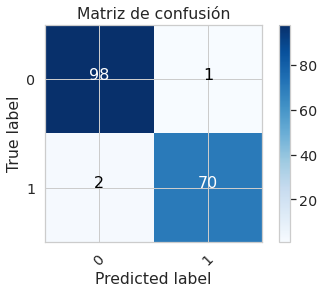

In [18]:
utn_utils1.plot_confusion_matrix(y_test, y_pred_test)

El modelo NN superó a la LR en accuracy. 